In [288]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd 
import numpy as np
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style 
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

In [289]:
style.use('seaborn-paper') #sets the size of the charts
sns.axes_style({'font.sans-serif': [
  'Liberation Sans']})

sns.set(font_scale=0.9)

In [290]:
def sum_df_by_year(dataframe):
    total=[]
    months=['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']
    for month in months:
        #print(month)
        #print(dataframe)
        df=pd.read_excel(dataframe, sheet_name=month)  # doctest: +SKIP
        #print(df)
        data=[]
        for n in range(0,len(df[0])):
            for m in range(0,len(df.count())-1):
                #print(m)
                #print(n)
                #print(df[m][n])
                data.append(df[m][n])
        
        data=np.array(data)
        #print(data)
        s=np.isnan(data)
        #print(data)
        data[s]=0.0
        total.append(sum(data))
        #print(sum(data))
    #print(total)
    return int(sum(total))




        


In [291]:
sum_df_by_year('2015-forms2.xlsx')


2171

In [292]:
sum_df_by_year('2016-forms2.xlsx')


4786

In [293]:
sum_df_by_year('2017-forms2.xlsx')


2721

In [294]:
sum_df_by_year('2018-forms2.xlsx')

5517

In [295]:
sum_df_by_year('2019-forms2.xlsx')

12133

In [296]:
sum_df_by_year('2020-forms2.xlsx')

184

In [318]:
year2014_fm=3247
year2015_fm=3247
year2016_fm=3028
year2018_nv=6004
year2019_nv=11258
year2015_wp=sum_df_by_year('2015-forms2.xlsx')
year2016_wp=sum_df_by_year('2016-forms2.xlsx')
year2017_wp=sum_df_by_year('2017-forms2.xlsx')
year2018_wp=sum_df_by_year('2018-forms2.xlsx')
year2019_wp=sum_df_by_year('2019-forms2.xlsx')
year2020_wp=sum_df_by_year('2020-forms2.xlsx')
print('año 2014')
print(year2014_fm)
print('año 2015')
print(str(year2015_fm) +' or '+str(int(year2015_wp)))
print('año 2016')
print(str(year2016_fm)+' or '+str(int(year2016_wp)))
print('año 2017')
print(str(int(year2017_wp)))
print('año 2018')
print(str(year2018_nv)+' or '+str(int(year2018_wp)))
print('año 2019')
print(str(year2019_nv)+' or '+str(int(year2019_wp)))


año 2014
3247
año 2015
3247 or 2171
año 2016
3028 or 4786
año 2017
2721
año 2018
6004 or 5517
año 2019
11258 or 12133


# Plot

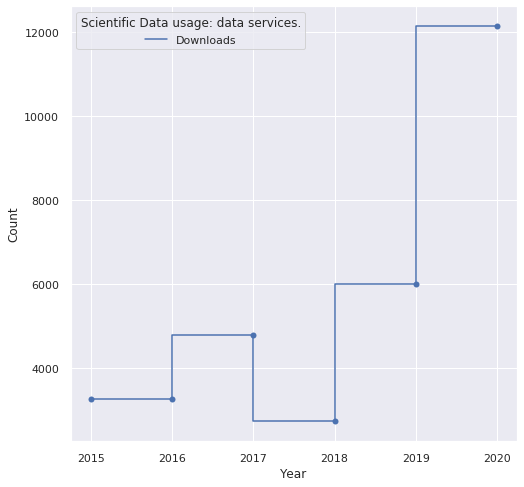

In [325]:
sns.set(rc={'figure.figsize':(8,8)})
x = [2015,2016,2017,2018,2019,2020]
y = [year2014_fm, year2015_fm, year2016_wp, year2017_wp, year2018_nv, year2019_wp]


plt.step(x, y , label='Downloads')
plt.plot(x, y , 'C0o', alpha=1)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
#plt.plot(x,p(x),"--")

plt.legend(title='Scientific Data usage: data services.')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
#ax = plt.axes()
# Setting the background color
#ax.set_facecolor("white")
plt.savefig('images/figure0.png', dpi=1000, bbox_inches='tight')
plt.show()

In [322]:
sns.set(rc={'figure.figsize':(6,7)})
df_2=pd.DataFrame()
df_2['Year']=[2014,2015,2016,2017,2018,2019,2020]
df_2['Count']=y
df_2.to_csv("total_downloads.csv", sep=',', encoding='utf-8')


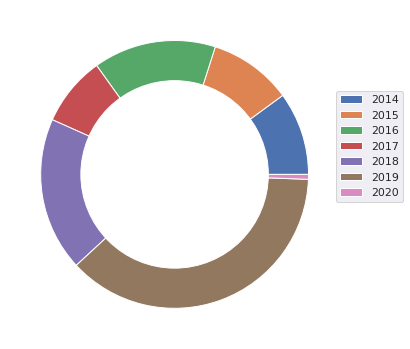

In [323]:
df = pd.read_csv("total_downloads.csv", sep=',', encoding='utf-8') 
#df=df.dropna(subset=['Count','Year'])
names=np.asarray(df['Year'])
size=df['Count']
#print(names)
#print(np.array(size))
#print(np.asarray(df['Type of institution'].value_counts().index))
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(np.array(df['Count']))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(labels=names, loc='lower right', bbox_to_anchor=(1.2,0.4))
#plt.legend(labels=names,loc='lower right', bbox_to_anchor=(2,0.5))
#plt.savefig('images/figure1.png', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

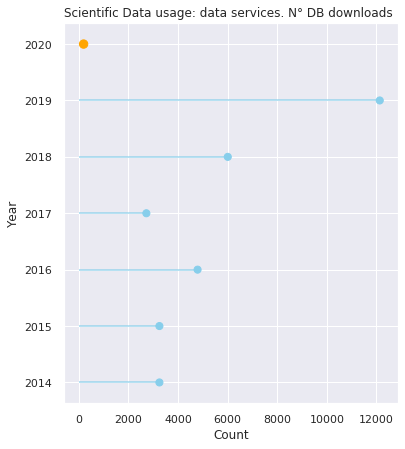

In [324]:
# Reorder it following the values:
ordered_df = df.sort_values(by='Year')
my_range=range(1,len(df.index)+1)
 
# Create a color if the group is "B"
my_color=np.where(ordered_df ['Count']== year2020_wp, 'orange', 'skyblue')
my_size=np.where(ordered_df ['Count']== year2020_wp, 70, 50)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Count'], color=my_color, alpha=0.8)
plt.scatter(ordered_df['Count'], my_range, color=my_color, s=my_size, alpha=1)
 
# Add title and exis names
plt.yticks(my_range, ordered_df['Year'])
plt.title("Scientific Data usage: data services. N° DB downloads", loc='left')
plt.xlabel('Count')
plt.ylabel('Year')
plt.savefig('images/figure2.png', dpi=1000, bbox_inches='tight')